# **Import Library**

In [ ]:
# import library
import pandas as pd
import numpy as np

# library visualization
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data**

In [ ]:
miniproject3 = pd.read_csv("/content/drive/MyDrive/MP3.csv")
miniproject3.head()

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_id,customer_city,customer_state,product_category_name,order_status
0,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,2018-08-08 10:00:35.000,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,perfumaria,delivered
1,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,59.99,2018-03-24 22:16:10.000,c6fc061d86fab1e2b2eac259bac71a49,piracicaba,SP,beleza_saude,delivered
2,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,49.90,2018-02-13 22:10:21.000,2355af7c75e7c98b43a87b2a7f210dc5,jandira,SP,ferramentas_jardim,delivered
3,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,49.90,2018-02-13 22:10:21.000,2355af7c75e7c98b43a87b2a7f210dc5,jandira,SP,ferramentas_jardim,delivered
4,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,99.90,2018-08-14 20:43:09.000,2a30c97668e81df7c17a8b14447aeeba,alfenas,MG,esporte_lazer,delivered


# **Overview**

In [ ]:
#Dataset dimension
row, col = miniproject3.shape

print(f"Total columns: {col}")
print(f"Total rows: {row}")

Total columns: 10
Total rows: 112650


In [ ]:
miniproject3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_item_id             112650 non-null  int64  
 2   product_id                112650 non-null  object 
 3   price                     112650 non-null  float64
 4   order_purchase_timestamp  112650 non-null  object 
 5   customer_id               112650 non-null  object 
 6   customer_city             112650 non-null  object 
 7   customer_state            112650 non-null  object 
 8   product_category_name     111047 non-null  object 
 9   order_status              112650 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.6+ MB


In [ ]:
miniproject3.describe(include=["object"])

#total count from product_category_name is under 112650. its indicate there are missing value in product_category_name

,order_id,product_id,order_purchase_timestamp,customer_id,customer_city,customer_state,product_category_name,order_status
count,112650,112650,112650,112650,112650,112650,111047,112650
unique,98666,32951,98112,98666,4110,27,73,7
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,2017-07-16 18:19:25.000,fc3d1daec319d62d49bfb5e1f83123e9,sao paulo,SP,cama_mesa_banho,delivered
freq,21,527,21,21,17808,47449,11115,110197


In [ ]:
miniproject3['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

# **Missing Value**

In [ ]:
#Check missing value
miniproject3.isnull().sum()

order_id                       0
order_item_id                  0
product_id                     0
price                          0
order_purchase_timestamp       0
customer_id                    0
customer_city                  0
customer_state                 0
product_category_name       1603
order_status                   0
dtype: int64

In [ ]:
#show missing value
null_mask = miniproject3.isnull().any(axis=1)
null_rows = miniproject3[null_mask]

null_rows.head()

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_id,customer_city,customer_state,product_category_name,order_status
25,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,2017-09-26 15:24:03.000,ae55e228ded796581eccc67045516023,sao paulo,SP,NaN,delivered
26,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,7.60,2017-02-13 16:18:07.000,baa4ed05f22ffb6c4a41b71b699a492c,juiz de fora,MG,NaN,delivered
190,01d72d42aaedb3736840132071d51100,1,8d39a63db6a98e40571f486e0c711cf7,147.20,2018-03-20 12:44:02.000,7f19d565d956cc2fe3f01a860e841ae4,ipora,GO,NaN,delivered
209,020f8f4df303ae8aa39b806b766d2681,1,b1d207586fca400a2370d50a9ba1da98,149.00,2017-12-27 09:58:49.000,d588273738545bc6a0d30971bf72e938,brasilia,DF,NaN,delivered
228,023ae47e11483bdb8aa35fa4662aee1c,1,00ab8a8b9fe219511dc3f178c6d79698,89.99,2017-04-10 12:41:33.000,a4856ab766d5bbc379fd5c770def82e5,niteroi,RJ,NaN,delivered


In [ ]:
#delete missing value
miniproject3.dropna(subset=['product_category_name'], inplace=True)

miniproject3.head()

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_id,customer_city,customer_state,product_category_name,order_status
0,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,2018-08-08 10:00:35.000,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,perfumaria,delivered
1,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,59.99,2018-03-24 22:16:10.000,c6fc061d86fab1e2b2eac259bac71a49,piracicaba,SP,beleza_saude,delivered
2,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,49.90,2018-02-13 22:10:21.000,2355af7c75e7c98b43a87b2a7f210dc5,jandira,SP,ferramentas_jardim,delivered
3,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,49.90,2018-02-13 22:10:21.000,2355af7c75e7c98b43a87b2a7f210dc5,jandira,SP,ferramentas_jardim,delivered
4,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,99.90,2018-08-14 20:43:09.000,2a30c97668e81df7c17a8b14447aeeba,alfenas,MG,esporte_lazer,delivered


In [ ]:
row, col = miniproject3.shape

print(f"Total columns: {col}")
print(f"Total rows: {row}")

#after delete 1603 missing value the total row become 111047

Total columns: 10
Total rows: 111047


In [ ]:
miniproject3.isnull().sum()

#there isn't missing value anymore

order_id                    0
order_item_id               0
product_id                  0
price                       0
order_purchase_timestamp    0
customer_id                 0
customer_city               0
customer_state              0
product_category_name       0
order_status                0
dtype: int64

In [ ]:
# Check inconsistent value for each categorical data
categori = ['customer_city', 'customer_state', 'product_category_name', 'order_status']

# Looping for unique values on each category
for i in categori:
  print(f"Unique Value from {i}:")
  print(sorted(miniproject3[i].unique()))
  print('\n')

# there is not inconsistent data

Unique Value from customer_city:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formosas', 'aguas frias', 'aguas lindas de goias', 'aguas mornas', 'aguas vermelhas', 'agudo', 'agudos', 'aguia branca', 'aimores', 'aiuaba', 'aiuruoca', 'ajapi', 'ajuricaba', 'alagoa', 'alagoa grande', 'alagoa nova

# **Duplicate Data**

In [ ]:
duplicate = miniproject3[miniproject3.duplicated(['order_id'])]
duplicate

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_id,customer_city,customer_state,product_category_name,order_status
3,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,49.90,2018-02-13 22:10:21.000,2355af7c75e7c98b43a87b2a7f210dc5,jandira,SP,ferramentas_jardim,delivered
11,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,18.99,2017-05-14 17:19:44.000,d987da9fb4086ab7c2c0f83963cd6722,sao paulo,SP,beleza_saude,delivered
30,00526a9d4ebde463baee25f386963ddc,2,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44.000,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered
31,00526a9d4ebde463baee25f386963ddc,3,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44.000,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered
32,00526a9d4ebde463baee25f386963ddc,4,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44.000,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered
...,...,...,...,...,...,...,...,...,...,...
112613,ffb9a9cd00c74c11c24aa30b3d78e03b,3,03bb06cda40712fb8473f7962fb7d198,129.90,2017-03-11 17:20:21.000,81a0150b8f472d0e5e82a7da198b93bc,congonhas,MG,cama_mesa_banho,delivered
112614,ffb9a9cd00c74c11c24aa30b3d78e03b,4,3321ad579f19476d0d668f726f8dffec,219.90,2017-03-11 17:20:21.000,81a0150b8f472d0e5e82a7da198b93bc,congonhas,MG,cama_mesa_banho,delivered
112618,ffc16cecff8dc037f60458f28d1c1ba5,2,7c1043bb5837db0c6bc1953419a18628,169.90,2017-11-21 19:25:15.000,bca26aa1960632e9fcb269e5eb8faabd,campinas,SP,papelaria,delivered
112628,ffd543c2b60842e148a86870dc60e212,2,b7d94dc0640c7025dc8e3b46b52d8239,175.91,2018-01-04 12:00:49.000,1a4eed32aecb25c4c294408905613487,sao paulo,SP,informatica_acessorios,delivered


In [ ]:
miniproject3[miniproject3['order_id']=='00526a9d4ebde463baee25f386963ddc']
#check order_id which has duplicate data.
#after we check for duplicate order_id values, they have different order item_ids. we can proceed to the next step

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_id,customer_city,customer_state,product_category_name,order_status
29,00526a9d4ebde463baee25f386963ddc,1,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered
30,00526a9d4ebde463baee25f386963ddc,2,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered
31,00526a9d4ebde463baee25f386963ddc,3,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered
32,00526a9d4ebde463baee25f386963ddc,4,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,2018-08-07 22:03:44,5848ef3f994e18c5121d291e0daedc81,ferraz de vasconcelos,SP,alimentos,delivered


# **Change Data Type**

In [ ]:
# order_purchase_timestamp  has type data as object. so we have to change it into date time
miniproject3['order_purchase_timestamp'] = miniproject3['order_purchase_timestamp'].astype('datetime64[ns]')


In [ ]:
miniproject3['order_purchase_timestamp'].dtype

dtype('<M8[ns]')

# **Data Visualization**

make a graph of total sales per month and quarter

In [ ]:
#pivot
q1_tanggal = miniproject3[['order_purchase_timestamp','order_id']]
q1_tanggal['Month Year'] = q1_tanggal['order_purchase_timestamp'].dt.strftime('%Y-%m')
pvq1 = pd.pivot_table(q1_tanggal, index='Month Year', values='order_id',aggfunc=pd.Series.nunique)
pvq1


<ipython-input-109-e5d416ef5ee5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_tanggal['Month Year'] = q1_tanggal['order_purchase_timestamp'].dt.strftime('%Y-%m')


,order_id
Month Year,
2016-09,3
2016-10,306
2016-12,1
2017-01,778
2017-02,1681
2017-03,2589
2017-04,2329
2017-05,3577
2017-06,3163


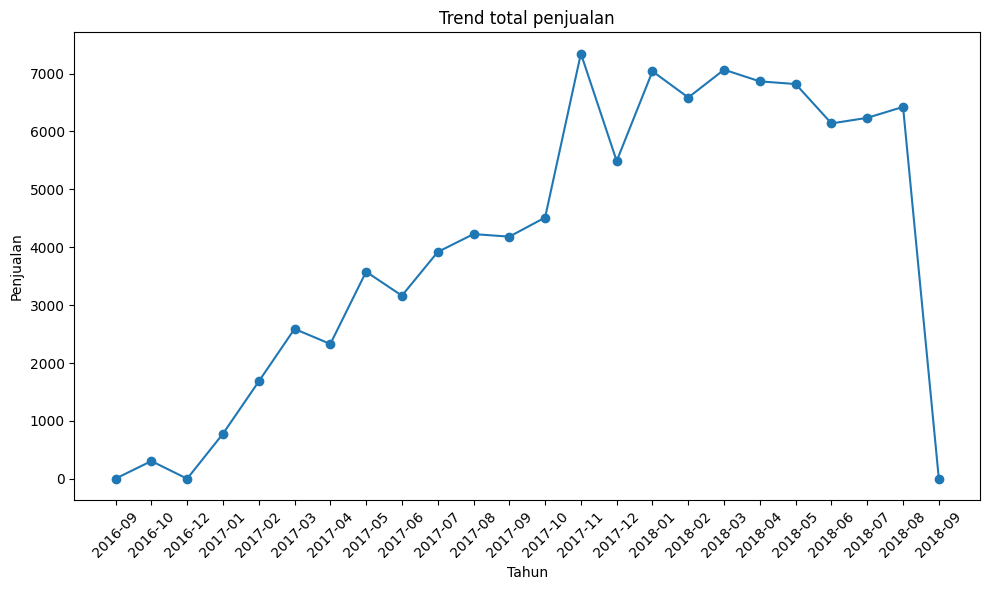

In [ ]:
#chart
plt.figure(figsize=(10,6))
plt.plot(pvq1.index.astype(str), pvq1['order_id'], label='order_id', marker='o')
plt.title('Total Sales per Month')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Total Sales per Month
miniproject3['quarter'] = miniproject3['order_purchase_timestamp'].dt.to_period('Q')

# Buat pivot table berdasarkan quarter
pvquarter = pd.pivot_table(miniproject3,index='quarter',values='order_id',aggfunc='count')
pvquarter.head(9)

,order_id
quarter,
2016Q3,6
2016Q4,362
2017Q1,5772
2017Q2,10173
2017Q3,14048
2017Q4,19954
2018Q1,23634
2018Q2,22836
2018Q3,14262


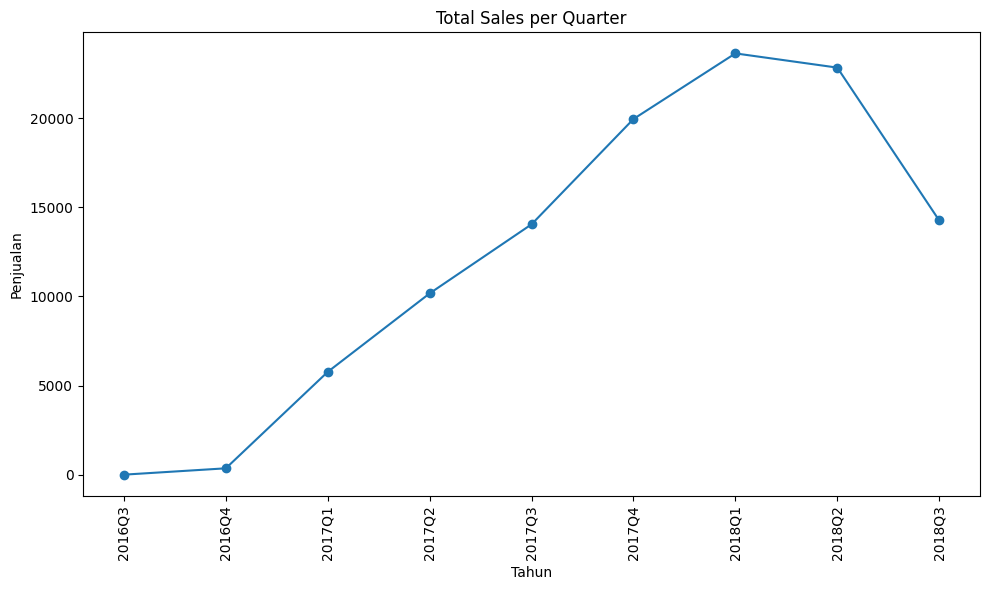

In [ ]:
#chart
plt.figure(figsize=(10,6))
plt.plot(pvquarter.index.astype(str), pvquarter['order_id'], label='order_id', marker='o')
plt.title('Total Sales per Quarter')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.xticks(rotation=90)
#plt.grid(True)
plt.tight_layout()
plt.show()

# Total price per customer_state menggunakan bar chart



In [ ]:
#pivot
pvq2 = pd.pivot_table(miniproject3, index='customer_state', values='price',aggfunc='sum').reset_index().sort_values(by='price')
pvq2

,customer_state,price
21,RR,7583.45
3,AP,13474.30
0,AC,15916.05
2,AM,21815.04
20,RO,45560.98
26,TO,49109.75
24,SE,58747.10
1,AL,79739.83
19,RN,82456.44
16,PI,86339.91


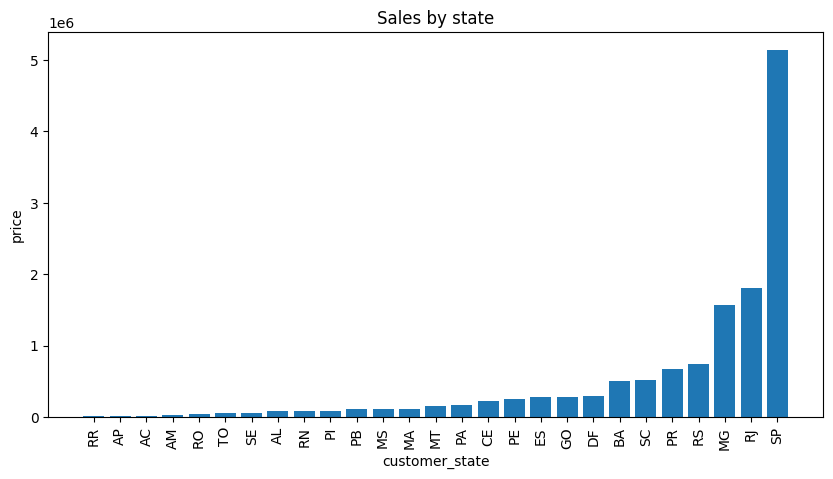

In [ ]:
#chart
plt.figure(figsize=(10,5))
plt.bar(pvq2['customer_state'], pvq2['price'])
plt.xlabel('customer_state')
plt.ylabel('price')
plt.title('Sales by state')
plt.xticks(rotation=90)
plt.show()

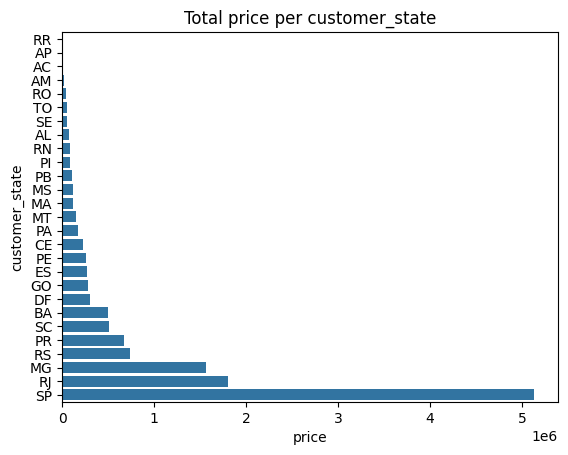

In [ ]:
#chart
sns.barplot(x=pvq2['price'], y=pvq2['customer_state'])
plt.xlabel('price')
plt.ylabel('customer_state')
plt.title('Total price per customer_state')
plt.show()

# Tampilkan total penjualan (order_id) berdasarkan order status menggunakan pie chart.

In [ ]:
#pivot
pvq3 = pd.pivot_table(miniproject3, index='order_status', values='order_id',aggfunc=pd.Series.nunique).reset_index()
pvq3 = pvq3.sort_values(by='order_id', ascending=True)
pvq3

,order_status,order_id
0,approved,2
6,unavailable,6
4,processing,289
3,invoiced,305
1,canceled,447
5,shipped,1082
2,delivered,95146


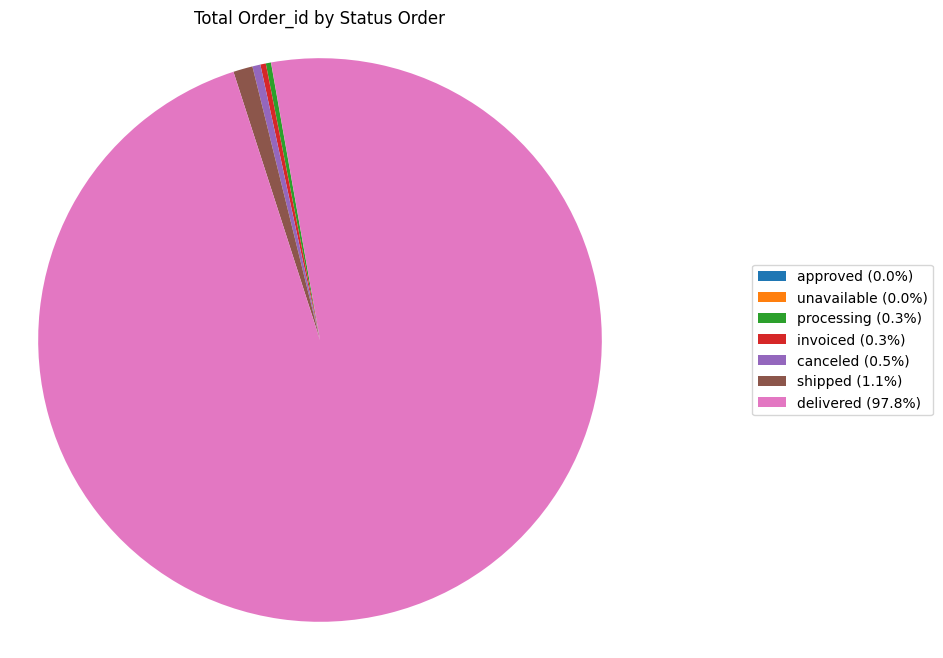

In [ ]:
# Plot pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(pvq3['order_id'], startangle=100, colors=plt.cm.tab10.colors)

#calculate the percentages for each categories
percentages = (pvq3['order_id'] /pvq3['order_id'].sum()) * 100
#make label based on pencentages
label = [f"{label} ({percent:.1f}%)" for label, percent in zip(pvq3.order_status, percentages)]

plt.legend(label, loc='center right', bbox_to_anchor=(1.5,0.5))
plt.title('Total Order_id by Status Order')
plt.axis('equal') # make sure the pie chart is circle
plt.show()

# Trend penjualan (order_id) per bulan di tahun 2018 di tiap order status menggunakan stack bar chart.

In [ ]:
#pivot
q4_tanggal = miniproject3[(miniproject3['order_purchase_timestamp']>= '2018-01-01') & (miniproject3['order_purchase_timestamp'] <= '2018-12-31')]
q4_tanggal['Month Year'] = q4_tanggal['order_purchase_timestamp'].dt.strftime('%Y-%m')
pvq4 = pd.pivot_table(q4_tanggal, index='Month Year',columns='order_status', values='order_id',aggfunc=pd.Series.nunique).reset_index()
pvq4

<ipython-input-103-0862945fba49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_tanggal['Month Year'] = q4_tanggal['order_purchase_timestamp'].dt.strftime('%Y-%m')


order_status,Month Year,canceled,delivered,invoiced,processing,shipped
0,2018-01,32.0,6901.0,14.0,26.0,66.0
1,2018-02,68.0,6450.0,5.0,6.0,57.0
2,2018-03,20.0,6884.0,23.0,9.0,131.0
3,2018-04,15.0,6731.0,13.0,8.0,98.0
4,2018-05,19.0,6716.0,24.0,6.0,54.0
5,2018-06,15.0,6078.0,3.0,NaN,43.0
6,2018-07,40.0,6121.0,13.0,1.0,60.0
7,2018-08,31.0,6324.0,22.0,NaN,47.0
8,2018-09,NaN,NaN,NaN,NaN,1.0


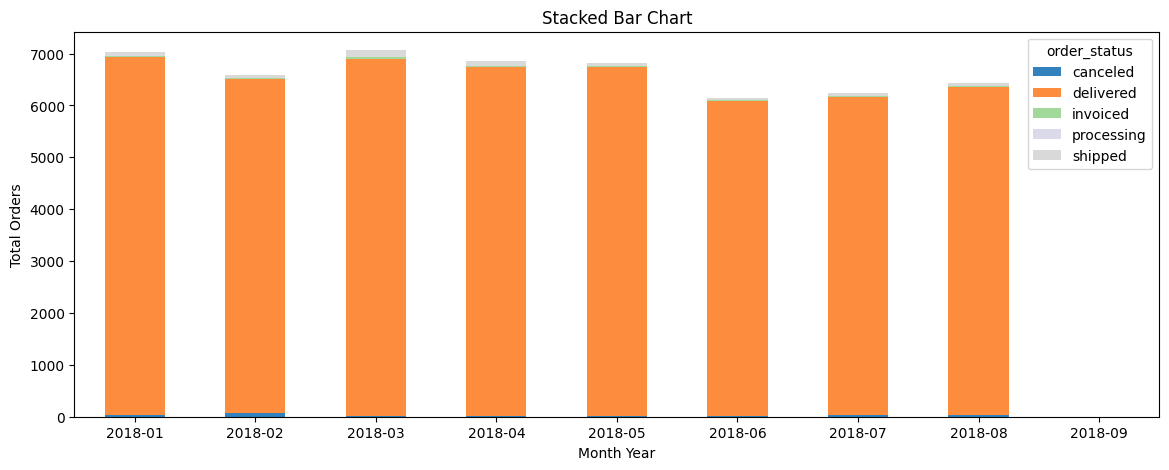

In [ ]:
#chart
fig, ax = plt.subplots(figsize=(14, 5))
pvq4.set_index('Month Year').plot(kind='bar', stacked=True, colormap='tab20c', ax=ax)
plt.xlabel("Month Year")
plt.ylabel("Total Orders")
plt.title("Stacked Bar Chart")
plt.xticks(rotation=0)
plt.show()